In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# import warnings
# warnings.filterwarnings('ignore')

In [2]:
path = "../data/players_stats_salary.csv"
df= pd.read_csv(path)
df.drop(columns=['Pos','Position(s)','Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y',
                 'First Name', 'Last Name', 'name', '_merge',
                 'Guaranteed Compensation'],inplace=True)
df.shape

(705, 82)

## need to write summary of cleaning steps below do all cleaning 

In [5]:

missing = [df.isnull().sum(),100*df.isnull().mean()]

m = pd.DataFrame(missing)
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(15)

count          %
Base Salary            181.0  25.673759
Club                   181.0  25.673759
Fouls                    0.0   0.000000
OG                       0.0   0.000000
PK_conceded              0.0   0.000000
PK_won                   0.0   0.000000
from_mish_tackles_won    0.0   0.000000
def_interceptions        0.0   0.000000
Crosses                  0.0   0.000000
Offsides                 0.0   0.000000
Fouls_drawn              0.0   0.000000
Second_yellow            0.0   0.000000
Aerial_Duels_lost        0.0   0.000000
Red_cards                0.0   0.000000
Yellow_cards             0.0   0.000000

In [4]:

cols = ['G/Sh','G/SoT','SoT%','npxG/Sh','Dist']

for col in cols:
    print(df[col].mean())
    df[col] = df[col].fillna(df[col].mean())

missing = [df.isnull().sum(),100*df.isnull().mean()]
m = pd.DataFrame(missing)
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head()

0.07877758913412566
0.2635576923076924
30.38505942275043
0.09062818336163007
16.973514431239416


count          %
Base Salary  181.0  25.673759
Club         181.0  25.673759
Fouls          0.0   0.000000
OG             0.0   0.000000
PK_conceded    0.0   0.000000

1. DATA PROFILES — PLOTS AND TABLES
Reviewing summary statistics
Summary statistics can be evaluated via a summary statistics table and by checking the individual variable distribution plots. Both will indicate the spread of your data. Depending on the distribution, you may be able to infer the mean from distribution plots; however, the summary table is the best way to review this value. Compare the example summary statistics table and the histogram plots for reference.

In [6]:
#check amount of players per roster in data
df['Squad_from_op'].value_counts().head(5)

Atlanta Utd         30
Toronto FC          30
D.C. United         28
Los Angeles FC      28
Portland Timbers    28
Name: Squad_from_op, dtype: int64

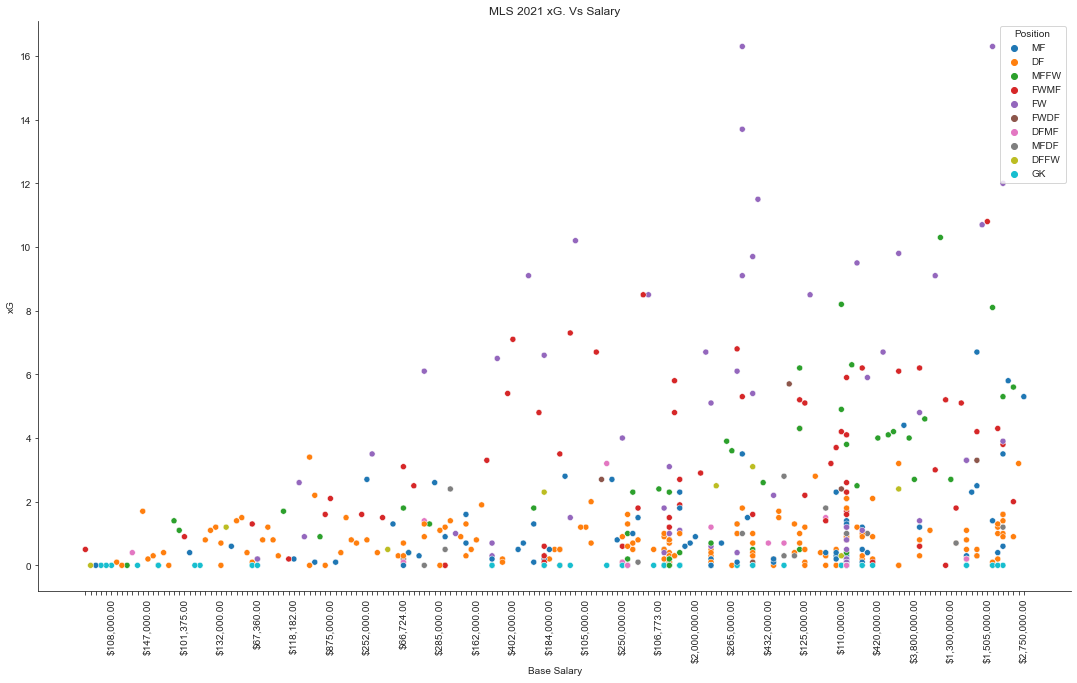

In [15]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plt.gca().invert_xaxis()
plt.xticks(rotation = 90)
g = sns.scatterplot(data=df, x ='Base Salary', y='xG',hue='Position',
                    ax=ax).set(title='MLS 2021 xG. Vs Salary')

every_nth = 7
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
sns.despine()


## clean up position values

The positions categories in the data do not match the fb_ref documentation so I am choosing to map 'Position' to the simple three lines positional categories. 

In [17]:

## problem - positions like left wing , attacking mid, defensive mid , center back not given - columns filled with unclear values

# solution- remap values to clear basic over arching position values - other features will be used to cluster players on

# technique - iterate over unique position values and clean up into 3 categories as initial mixed up values not descriptive enough to keep

for i in df['Position'].unique():
  if i in ['FWMF','MFFW','MFDF','DFMF']:
    df['Position'] = df['Position'].str.replace(i,'MF')

  if i in ['FWDF', 'DFFW']:
    df['Position'] = df['Position'].str.replace(i,'FW')
    
df['Position'].value_counts()

MF    307
DF    227
FW    106
GK     65
Name: Position, dtype: int64

## reviewing xG graph redone after position mapping. 

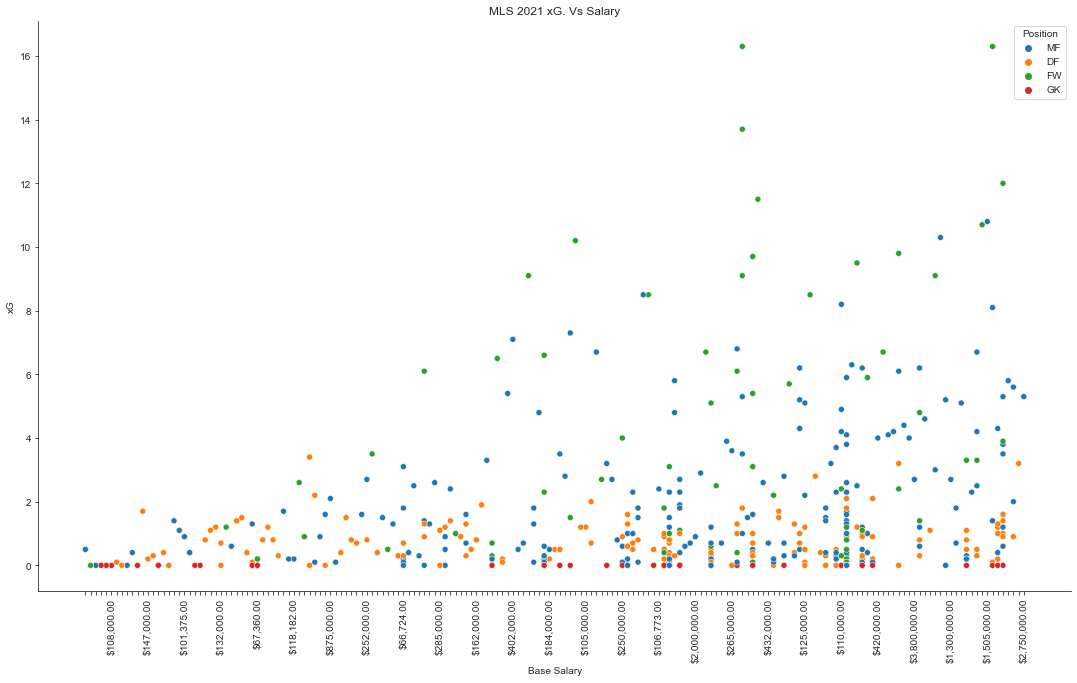

In [18]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plt.gca().invert_xaxis()
plt.xticks(rotation = 90)
g = sns.scatterplot(data=df, x ='Base Salary', y='xG',hue='Position',
                    ax=ax).set(title='MLS 2021 xG. Vs Salary')
every_nth = 7
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
sns.despine()




## xA vs Salary 

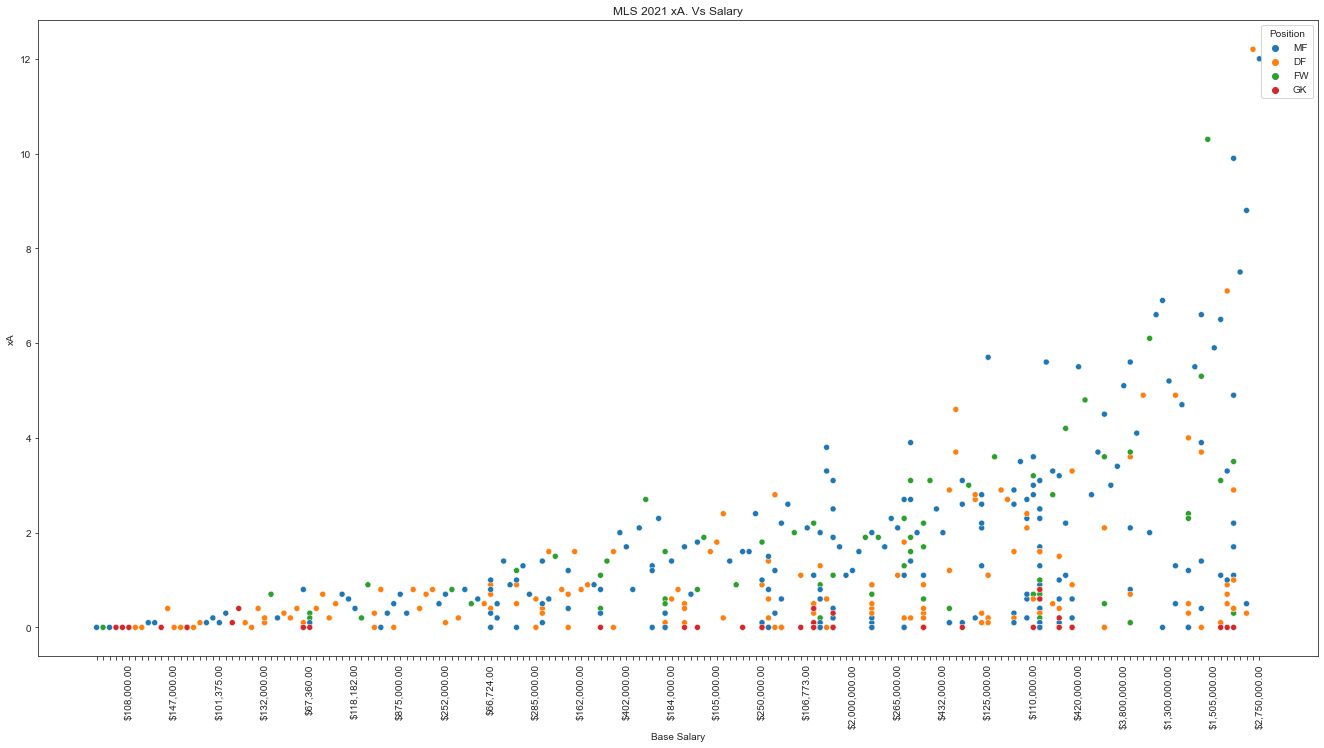

In [9]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plt.gca().invert_xaxis()
plt.xticks(rotation = 90)

g = sns.scatterplot(data=df, x ='Base Salary', y='xA',hue='Position',
                ax=ax).set(title='MLS 2021 xA. Vs Salary')
               
every_nth = 7
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.tight_layout()


The above graph shows there is a clear positive corelation between Salary and expected Assists. There seems to be a clear you get what you pay for relationship between players who create assists. Some defenders and goalies do not follow this trend as there some some across the pay scale with no xA. 

## To be able to use the salary data in models I am remaping the values to intergers.


In [10]:
df['Base Salary'] = df['Base Salary'].str.replace('$','')
df['Base Salary'] = df['Base Salary'].str.replace(',','')
df['Base Salary'] = pd.to_numeric(df['Base Salary'])
df[['Base Salary']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Base Salary  524 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


<ipython-input-10-fb7bb4a299a8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Base Salary'] = df['Base Salary'].str.replace('$','')


<AxesSubplot:xlabel='Position', ylabel='Base Salary'>

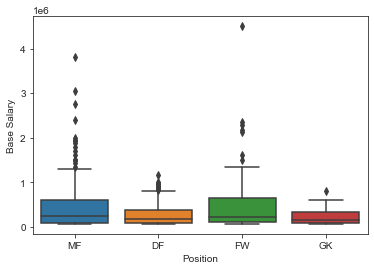

In [11]:
sns.boxplot(x ='Position', y='Base Salary',data=df)

##Insight - 
- We see 75 % of all position groups pay are below 100,000.
- There are more high paid Midfielders than any other position(shown as the outliers in the graph)  
- defenders and goal keepers have the lowest mean pay out of the groups. 

# Feature engineering 


1-convert player season data to per 90 stats to adjust for different amounts of games played per player.

2- create possesion adjusted stats for defensive KPIs to better show defenders metrics 

## objective -1 Adjust season stats to per ninety stats for accurate stat comparison.

In [12]:
# players to deal with playing less than 1 game for calculations
len(df[df['Nineties']<1])

35

In [13]:
def per_90(cols,df):
    # create list of games played values and map anything less than 1 to one 
    nines=[i if i >1 else 1 for i in df['Nineties'] ]
    # use new list to do calc so not dividing by value less than 1 
    for col in cols:
        df[col] = df[col]/nines
    return df


In [14]:
## create list of columns to be adjusted to per 90 stats
cols =  [
         # this needs to be done on by teams 90's 'Opposing_Touches',
'xA','Key_pass','Comp_prog','Total_Cmp','Total_Att','Total_Tot_Dist','Total_Prg_Dist','Short_Cmp','Short_Att','Medium_Cmp','Medium_Att','Long_Cmp','Long_Att',
'touches','touches_def_box','touches_def_3rd','touches_mid_3rd','touches_att_3rd','touches_att_box','touch_live','dribble_Succ','dribble_Att',
'num_dribble_past','dribble_megs','carries','carries_dist','carries_prog_dist','carries_prog','carries_att_3rd','carries_att_box','miss_control','dispossed','recep_targ',
'recep_succ','Yellow_cards','Red_cards','Second_yellow','Fouls','Fouls_drawn','Offsides','Crosses','def_interceptions','from_mish_tackles_won','PK_won','PK_conceded','OG',
'Recoveries','Aerial_Duels_lost','Gls','Sh','SoT','Sh/90','SoT/90','G/Sh','G/SoT','Dist','FK','PK','PKatt', 'xG','npxG','npxG/Sh','G-xG','np:G-xG'


]

In [15]:

df =  per_90(cols,df)
df[['player_name','Opposing_Touches','xA','Key_pass','Comp_prog','Total_Cmp','Total_Att']].head(3)

player_name  Opposing_Touches        xA  Key_pass  Comp_prog  \
0       Carles Gil             20024  0.472441  5.275591  10.905512   
1   Julian Gressel             20526  0.408027  3.210702   5.551839   
2  Emanuel Reynoso             20887  0.332075  3.433962   8.830189   

   Total_Cmp  Total_Att  
0  48.818898  65.708661  
1  37.324415  57.926421  
2  42.113208  61.056604

In [ ]:
df['int_tackl_blocks'] = df['pAdj_def_interceptions']+df['pAdj_from_mish_tackles_won']+df['pAdj_Recoveries']


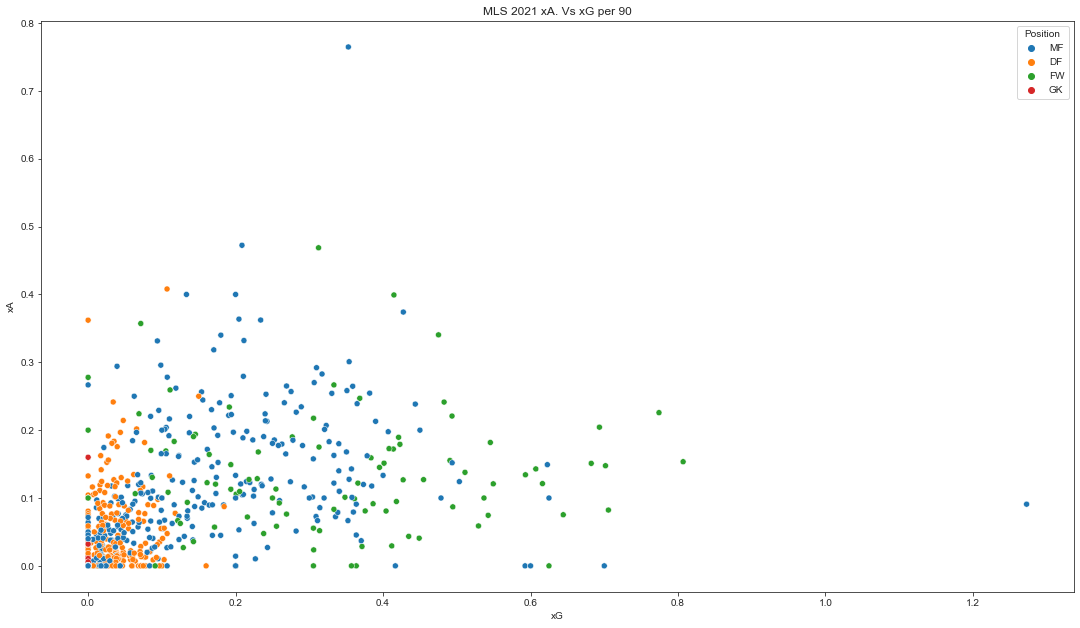

In [16]:
graph = df.loc[(df['int_tackl_recover']<35)&(df['Position']!='GK')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=graph, x ='xG', y='xA',hue='Position', ax=ax).set(title='MLS 2021 xA. Vs xG per 90')


In [17]:
df.loc[df['xG']>1][['xG','xA','player_name', 'Squad_from_op','Nineties','Gls']]

xG        xA  player_name Squad_from_op  Nineties       Gls
470  1.272727  0.090909  Abu Danladi     Nashville       1.1  0.909091

In [18]:
df.loc[df['xA']>.7][['xG','xA','player_name', 'Squad_from_op','Nineties','Gls']]

xG        xA player_name Squad_from_op  Nineties       Gls
471  0.352941  0.764706     Léo Chú       Seattle       1.7  0.588235

## Insight 
- feature engineering gives players who have not played to many games some edge and can be filtered out for models if needed. 
- The expected trends of forwards haivng the most xG by the green points to the right side of the graph.
- Midfielders having the most xA or a mix of both can be seen  and the blue ones towards the top half of the graph around 5 to 10 xG. 
- There is only two defenders with xA above 6 and no defenders above 4 xG, the majority are clusterd in the bottom left of the graph. 

In [19]:
## check players who played less than 1 game no not have increased features

df.loc[(df['player_name']=='Jason Pendant') | (df['player_name']=='Jordan Harvey') ][['player_name', 'Squad_from_op',
       'Long_Att','Long_Cmp','Long_Cmp_pct', 'Nation', 'Position', 'Nineties',
       'xA', 'Key_pass']]

player_name   Squad_from_op  Long_Att  Long_Cmp  Long_Cmp_pct  Nation  \
605  Jason Pendant    NY Red Bulls       4.0       3.0          75.0  fr FRA   
609  Jordan Harvey  Los Angeles FC       5.0       5.0         100.0  us USA   

    Position  Nineties   xA  Key_pass  
605       DF       0.1  0.0       0.0  
609       DF       0.1  0.0       0.0

check to confirm the new df has per 90 stats instead of season totals 

## Objective - 2  Create possesion adjusted metrics , " pAdj "

using stat per 1000 opponent touches as scale to create pAdj stat 
ex: tackles per 1000 opponent touches instead of just tackles per 90 

In [20]:
df['Opposing_Touches'].value_counts().head()

17449    30
21171    30
20480    28
20501    28
21209    28
Name: Opposing_Touches, dtype: int64

In [21]:
# each team played 34 games so to get opposing touches per 90 divide by 34

df['Opposing_Touches'] = df['Opposing_Touches']/34
df['Opposing_Touches'].describe()

count    705.000000
mean     595.045807
std       30.746442
min      513.205882
25%      577.647059
50%      593.529412
75%      620.470588
max      659.294118
Name: Opposing_Touches, dtype: float64

In [22]:

cols=[
      # defensive stats to be adjusted by possesion 
    'Yellow_cards','Red_cards','Second_yellow','Fouls','def_interceptions',
    'from_mish_tackles_won','PK_conceded','OG','Recoveries','Aerial_Duels_lost']

In [23]:
df['def_interceptions'].describe()

count    705.000000
mean       1.325073
std        0.962239
min        0.000000
25%        0.510949
50%        1.323529
75%        1.959459
max        5.000000
Name: def_interceptions, dtype: float64

In [24]:
def pAdj(df,cols):
  """ create possesion adjusted defensive stats and remove orignial"""
  for col in cols:
    label = 'pAdj_'+col
  
    df[label] = (df[col]/df['Opposing_Touches']) * 1000
    df.drop(columns=[col],inplace=True)
  
  return df

In [25]:
df=pAdj(df,cols)
df[[ 'player_name','pAdj_def_interceptions','pAdj_from_mish_tackles_won','pAdj_PK_conceded','pAdj_OG','pAdj_Recoveries','pAdj_Aerial_Duels_lost']].head()

player_name  pAdj_def_interceptions  pAdj_from_mish_tackles_won  \
0           Carles Gil                1.537525                    0.267396   
1       Julian Gressel                3.767145                    1.052585   
2      Emanuel Reynoso                1.658520                    2.641347   
3        Albert Rusnák                1.304421                    0.834829   
4  Maximiliano Moralez                1.526455                    1.725558   

   pAdj_PK_conceded  pAdj_OG  pAdj_Recoveries  pAdj_Aerial_Duels_lost  
0               0.0      0.0        10.963222                0.267396  
1               0.0      0.0        13.905196                1.661976  
2               0.0      0.0        12.162481                1.105680  
3               0.0      0.0        10.591897                0.208707  
4               0.0      0.0        11.083393                0.663676

In [27]:
df['pAdj_def_interceptions'].describe()

count    705.000000
mean       2.231026
std        1.625044
min        0.000000
25%        0.847926
50%        2.225200
75%        3.271473
max        8.502551
Name: pAdj_def_interceptions, dtype: float64

In [28]:
# save df with adjusted features for further steps

df.to_csv('../data/final_per_90_and_pAdj.csv', encoding='utf-8', index=False)



In [29]:
df.head()

fb_id          player_name   Squad_from_op  Opposing_Poss  \
0  11c30a46           Carles Gil     New England           49.1   
1  acd47bc0       Julian Gressel     D.C. United           54.0   
2  614b26e3      Emanuel Reynoso   Minnesota Utd           49.9   
3  0adeafaa        Albert Rusnák  Real Salt Lake           49.1   
4  f99f37fc  Maximiliano Moralez           NYCFC           46.5   

   Opposing_Touches  Nation Position  Nineties        xA  Key_pass  ...  \
0        588.941176  es ESP       MF      25.4  0.472441  5.275591  ...   
1        603.705882  de GER       DF      29.9  0.408027  3.210702  ...   
2        614.323529  ar ARG       MF      26.5  0.332075  3.433962  ...   
3        567.029412  sk SVK       MF      33.8  0.213018  2.573964  ...   
4        568.588235  ar ARG       MF      26.5  0.362264  3.132075  ...   

   pAdj_Yellow_cards  pAdj_Red_cards  pAdj_Second_yellow  pAdj_Fouls  \
0          11.230618        0.000000                 0.0    0.467942   
1           6.260108        0.000000                 0.0    1.938972   
2          13.821001        0.061427                 0.0    3.562747   
3           8.191763        0.000000                 0.0    1.200067   
4          14.932715        0.066368                 0.0    2.986543   

   pAdj_def_interceptions  pAdj_from_mish_tackles_won  pAdj_PK_conceded  \
0                1.537525                    0.267396               0.0   
1                3.767145                    1.052585               0.0   
2                1.658520                    2.641347               0.0   
3                1.304421                    0.834829               0.0   
4                1.526455                    1.725558               0.0   

   pAdj_OG  pAdj_Recoveries  pAdj_Aerial_Duels_lost  
0      0.0        10.963222                0.267396  
1      0.0        13.905196                1.661976  
2      0.0        12.162481                1.105680  
3      0.0        10.591897                0.208707  
4      0.0        11.083393                0.663676  

[5 rows x 88 columns]

## Feature vizual exploration 

- with the data now scaled to per 90 and possesion adjusted key features are to be visualised and observed below to looks for trends. 

In [33]:
# create defender only df 
defenders = df.loc[(df['Position']=='DF')&( df['Nineties'] >.9)]

In [34]:
#summary stats table transposed for df

# put higher up and show key features 
defenders.describe().T

count        mean        std         min  \
Opposing_Poss               216.0   49.991667   3.215475   42.600000   
Opposing_Touches            216.0  594.614379  29.964880  513.205882   
Nineties                    216.0   16.545370   9.163085    1.000000   
xA                          216.0    0.052368   0.062253    0.000000   
Key_pass                    216.0    0.535475   0.561490    0.000000   
...                           ...         ...        ...         ...   
pAdj_from_mish_tackles_won  216.0    1.816016   0.868210    0.000000   
pAdj_PK_conceded            216.0    0.033753   0.086475    0.000000   
pAdj_OG                     216.0    0.020748   0.114465    0.000000   
pAdj_Recoveries             216.0   12.555701   2.660552    3.714538   
pAdj_Aerial_Duels_lost      216.0    3.037721   1.814484    0.000000   

                                   25%         50%         75%         max  
Opposing_Poss                47.400000   50.200000   51.900000   55.100000  
Opposing_Touches            577.647059  593.529412  620.470588  659.294118  
Nineties                      8.900000   17.150000   23.325000   34.000000  
xA                            0.008474    0.030152    0.078985    0.408027  
Key_pass                      0.125590    0.312500    0.825563    3.210702  
...                                ...         ...         ...         ...  
pAdj_from_mish_tackles_won    1.258789    1.783555    2.291729    6.174785  
pAdj_PK_conceded              0.000000    0.000000    0.054912    0.972621  
pAdj_OG                       0.000000    0.000000    0.000000    1.598856  
pAdj_Recoveries              10.968225   12.165533   14.247242   22.106632  
pAdj_Aerial_Duels_lost        1.709210    2.709367    3.880811    9.862959  

[77 rows x 8 columns]

# Passing features 

<ipython-input-36-a5a96b1b3e52>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist = defenders[['player_name',


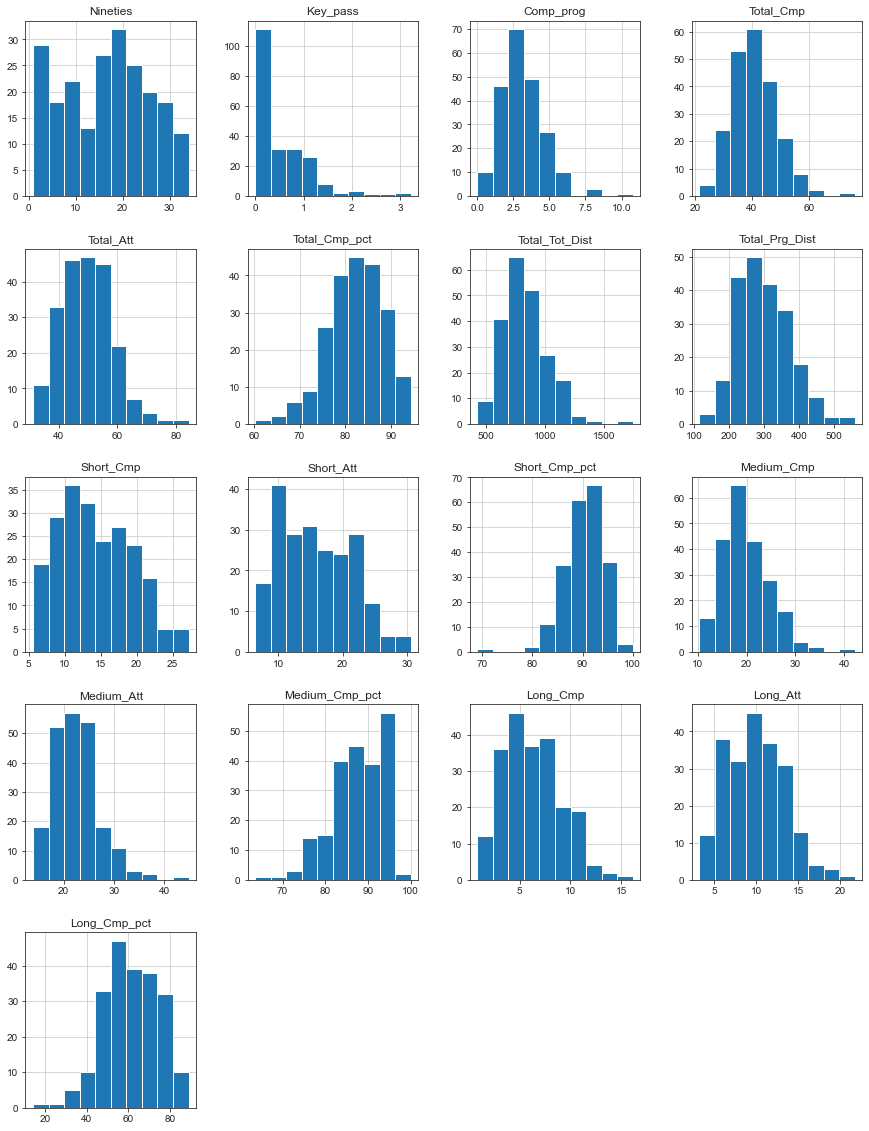

In [36]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = defenders[['player_name',
 'Nineties',
 'Key_pass',
 'Comp_prog',
 'Total_Cmp',
 'Total_Att',
 'Total_Cmp_pct',
 'Total_Tot_Dist',
 'Total_Prg_Dist',
 'Short_Cmp',
 'Short_Att',
 'Short_Cmp_pct',
 'Medium_Cmp',
 'Medium_Att',
 'Medium_Cmp_pct',
 'Long_Cmp',
 'Long_Att',
 'Long_Cmp_pct']].hist(bins=10, ax=ax )


Passing attempt features have distinctly right tailed data and are skewed to the left,
 and passing pct features have left tails and are skewed to the right.

 Both of these observations are to be expected in the data as only few players will have a large amount of the different kind of attempts. There is also a basic threshold for completion percentage among players in the league for the various pass types. 

filering out players with less than 5 games could possibly change graphs. 

When comparing the completion pct features, long comp pct is the closest to being normally distributed. There are only a few players at the high completion percentages for long balls creating a left handed tail. The mode for short and medium pct due to is in the mid 90's while long balls are in the 50s. 
 

<ipython-input-37-222243c2522e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist = defenders[['Short_Cmp_pct','Medium_Cmp_pct','Long_Cmp_pct','Total_Cmp_pct']].hist(bins=10,ax=ax)


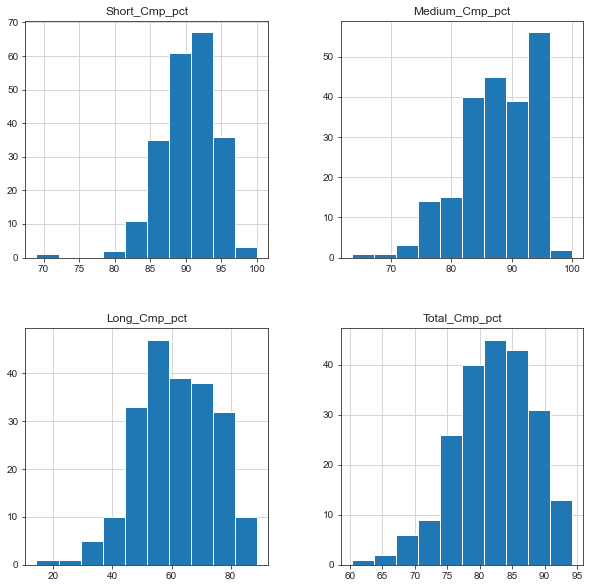

In [37]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
hist = defenders[['Short_Cmp_pct','Medium_Cmp_pct','Long_Cmp_pct','Total_Cmp_pct']].hist(bins=10,ax=ax)
plt.show()

In [39]:
passes = defenders[[
 'Opposing_Poss',
 'Opposing_Touches',
 'Nation',
 'Position',
 'xA',
 'Key_pass',
 'Comp_prog',
 'Total_Cmp',
 'Total_Att',
 'Total_Cmp_pct',
 'Total_Tot_Dist',
 'Total_Prg_Dist',
 'Short_Cmp',
 'Short_Att',
 'Short_Cmp_pct',
 'Medium_Cmp',
 'Medium_Att',
 'Medium_Cmp_pct',
 'Long_Cmp',
 'Long_Att',
 'Long_Cmp_pct']]

In [40]:
passes.corr().style.background_gradient(cmap="GnBu")

Expected Assists and short completions and sort attempts have a positive corelation of 0.58	and 0.61 respectivly. 
interestinly xA and short comp percent have .25 % negative correlation, this could point to trying to slot lots of short passes into dangerous areas that may not always be completed results in more expected assists than just lots of completed short passes that do not create shoring changes. Other features correlation to xA and xG can be followed up. 

In [ ]:
#summary stats table transposed for df
df.describe().T


hist = df.hist(bins=30, figsize=(10,10)


# workflow for catagorecial variables 
df_cat = df.select_dtypes(include='object').copy()

df_cat.col.value_counts()

sns.countplot(data=df_cat,x='colname')

#use boxplot to observe outliers - key for anamoly dection 

boxplot = df.boxplot(grid = False,vert=False,fontsize=15)



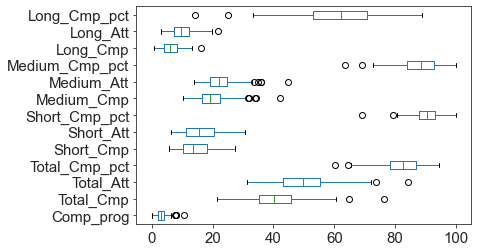

In [46]:
#use boxplot to observe outliers - key for anamoly dection 

boxplot = defenders[[
 'Comp_prog',
 'Total_Cmp',
    'Short_Cmp',
     'Medium_Cmp',
    'Long_Cmp',

 'Total_Cmp_pct',
    'Short_Cmp_pct',
    'Medium_Cmp_pct',
    'Long_Cmp_pct'
 
    'Total_Att',
 'Short_Att',
 'Medium_Att',
 'Long_Att']].boxplot(grid = True,vert=False,fontsize=15)


2. DATA RELATIONSHIPS
Investigating variable relationships through covariance matrices and other analysis methods is essential for not only evaluating the planned modeling strategy but also allows you to understand your data further. Below, we calculated the correlation coefficients for each variable in the data frame and then fed those correlations into a heatmap for ease of interpretation

In [ ]:
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# ax = df.plot(kind='scatter',x='x',y='y')
# df[['x','y','lbl']].apply(lambda row: ax.text(*row),axis=1);

ax = df1.plot(kind='scatter',x='win/90', y ='GD' )
df1[['win/90','GD' ,'Squad']].apply(lambda row: ax.text(*row),axis=1)

In [ ]:
## viz group by columns 

spm.reindex(index=spm.mean(axis=1).sort_values(ascending=False).index).plot(
kind='barh',figsize=(10,10))
plt.xlabel('Price')


In [ ]:
2.6.3.5.2 Distribution of weekday and weekend price by state
Next, you can transform the data into a single column for price with a new categorical column that represents the ticket type.

#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state','AdultWeekday','AdultWeekend']], 
                        id_vars='state',
              var_name='Ticket',
              value_vars=['AdultWeekday','AdultWeekend'],
              value_name='Price')



This is now in a format we can pass to seaborn's boxplot function to create boxplots of the ticket price distributions for each ticket type for each state.

#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

In [ ]:
plt.figure(10,12)
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu"annot=True)
plt.yticks(rotation=0)


# can also look at variable distributions and correlations with pairplots

g = sns.pairplot(df)



3. IDENTIFYING AND CREATING FEATURES
Variables and features are almost synonymous. The primary difference tends to be the context in which they are used; in machine learning, it is common practice to identify predictive features in your data whereas in parametric statistics, features are often referred to as variables and variables can include the response variable which you predict with your model.

The goal of identifying features is to use your exploratory work to isolate features that will be most helpful in constructing a predictive model. In addition to recognizing those features, it often behooves one to create additional features for inclusion in your predictive modeling work.
Once you have identified the critical features for your model development, you may realize you need to create additional features to augment your original data. You can do this through the development of combining features or revaluing them to emphasize specific relationships. Additional features can also be created through Principal Components Analysis or Clustering.

Building a Principle Components Analysis (PCA) is a useful way to apply a dimension reduction application to identify which features contain the most amount of variation within your development dataset. The predictive model can be constructed on the principal components themselves as features, resulting in feature reduction. Feature reduction is helpful when your data set has too many features to choose from, and you need a more automated way to reduce the number of input features for modeling. There are different flavors of dimension reduction methods based on multi-dimensional scaling, such as Principal Coordinate Analysis. Lasso regression is another tool for a semi-automated feature selection approach. Review these methods to determine the best strategy for your project.


Clustering (e.g. K-means clustering) is an excellent exploratory analysis method for creating additional features which in this case would be the clusters themselves. The clusters can be used in conjunction with additional features if you find them to be valid after review.